In [1]:
import cairosvg
import numpy as np
from utils import *
from mindquantum.core.gates import *
from IPython.display import display_svg
from mindquantum.core.circuit import Circuit
from utils import circuit_depth, qutrit_symmetric_ansatz

np.set_printoptions(linewidth=1000)


def save_img(circ: Circuit, name: str, dpi: int = 400, scale: int = 8):
    img = os.path.join(os.getcwd(), 'img/draw_qutrit')
    path = os.path.join(img, name)
    svg = f'{img}/{name}.svg'
    circ.svg().to_file(svg)
    if 'png' in name:
        cairosvg.svg2png(url=svg, write_to=path, dpi=dpi, scale=scale)
    elif 'pdf' in name:
        cairosvg.svg2pdf(url=svg, write_to=path, dpi=dpi, scale=scale)
    else:
        raise ValueError(f'Wrong input name: {name}')
    if os.path.exists(svg):
        os.remove(svg)


def count_gates(ansatz):
    gates = {\
        'single': {'X': 0, 'RY': 0, 'RZ': 0, 'GP': 0},
        'ctrl1': {'C_X': 0, 'C_RY': 0, 'C_RZ': 0, 'C_GP': 0},
        'ctrl2': {'CC_X': 0, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
        'ctrl3': {'CCC_X': 0, 'CCC_RY': 0, 'CCC_RZ': 0, 'CCC_GP': 0}
    }
    for g in ansatz:
        l = len(g.ctrl_qubits)
        if l > 0:
            gates[f'ctrl{l}'][f'{"C"*l}_{g.name}'] += 1
        else:
            gates['single'][g.name] += 1
    return gates


def count_cnot(ansatz):
    num_cnot = 0
    for g in ansatz:
        l = len(g.ctrl_qubits)
        if l == 1:
            num_cnot += 1 if g.name == 'X' else 2
        elif l == 2:
            num_cnot += 6 if g.name == 'X' else 8
        elif l == 3:
            num_cnot += 24
    return num_cnot

Number of qubits: 2
Number of CNOT: 32
Number of gates: 25
Number of params: 9
Depth of circuit: 23


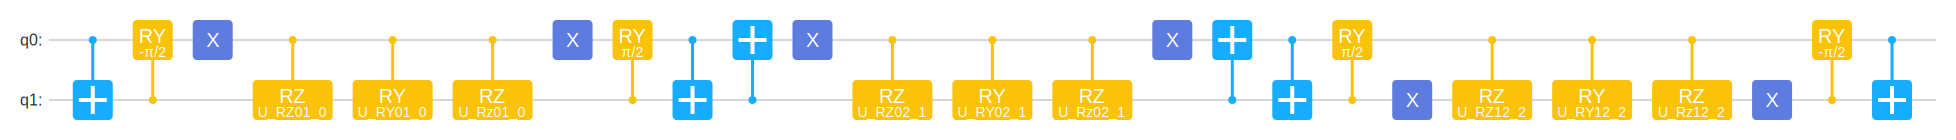

{'single': {'X': 6, 'RY': 0, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 6, 'C_RY': 7, 'C_RZ': 6, 'C_GP': 0},
 'ctrl2': {'CC_X': 0, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 0, 'CCC_RY': 0, 'CCC_RZ': 0, 'CCC_GP': 0}}

In [2]:
nq = 2
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('U', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
cnot = count_cnot(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of CNOT: {cnot}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
display_svg(ansatz.svg())
gates

In [3]:
nq = 4
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('U', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
cnot = count_cnot(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of CNOT: {cnot}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
display_svg(ansatz.svg())
gates

Number of qubits: 4
Number of CNOT: 3908
Number of gates: 442
Number of params: 102
Depth of circuit: 400


{'single': {'X': 58, 'RY': 8, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 62, 'C_RY': 63, 'C_RZ': 54, 'C_GP': 0},
 'ctrl2': {'CC_X': 62, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 62, 'CCC_RY': 48, 'CCC_RZ': 10, 'CCC_GP': 15}}

In [4]:
layers = 2
d = 3  # dimension of qudit state
k = 6  # number of gates in one layer
nq = (k + 1) * (d - 1)  # number of qubits
ansatz = Circuit()  # qutrit symmetric ansatz
for i in range(layers):
    for j in range(k):
        name = f'G{j + 1}_L{i + 1}'
        mat = np.eye(2**(2 * (d - 1)))
        obj = range(nq - (d - 1) * (j + 2), nq - (d - 1) * j)
        gate_u = UnivMathGate(name, mat).on(obj)
        ansatz += qutrit_symmetric_ansatz(gate_u)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
cnot = count_cnot(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of CNOT: {cnot}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
gates

Number of qubits: 14
Number of CNOT: 46896
Number of gates: 5304
Number of params: 1224
Depth of circuit: 1198


{'single': {'X': 696, 'RY': 96, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 744, 'C_RY': 756, 'C_RZ': 648, 'C_GP': 0},
 'ctrl2': {'CC_X': 744, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 744, 'CCC_RY': 576, 'CCC_RZ': 120, 'CCC_GP': 180}}